## Machine Learning Model for Predicting School Admissions from an Indian Perspective



### About this dataset

#### Context 
This dataset is created for prediction of Graduate Admissions from an Indian perspective.

#### Content  
The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

GRE Scores ( out of 340 )  
TOEFL Scores ( out of 120 )  
University Rating ( out of 5 )  
Statement of Purpose and Letter of Recommendation Strength ( out of 5 )  
Undergraduate GPA ( out of 10 )  
Research Experience ( either 0 or 1 )  
Chance of Admit ( ranging from 0 to 1 )  

#### Acknowledgements  
This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format.
The dataset is owned by Mohan S Acharya.

#### Inspiration  
This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

#### Citation  
Please cite the following if you are interested in using the dataset :
Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

I would like to thank all of you for contributing to this dataset through discussions and questions. I am in awe of the number of kernels built on this dataset. Some results and visualisations are fantastic and makes me a proud owner of the dataset. Keep em' coming! Thank You.

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Read dataset and display columns

In [2]:
admit_data = pd.read_csv("Admission_Predict.csv")
admit_data.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

# Examine basic statistics of the data

In [3]:
admit_data.describe().T

count        mean         std     min     25%     50%  \
Serial No.         400.0  200.500000  115.614301    1.00  100.75  200.50   
GRE Score          400.0  316.807500   11.473646  290.00  308.00  317.00   
TOEFL Score        400.0  107.410000    6.069514   92.00  103.00  107.00   
University Rating  400.0    3.087500    1.143728    1.00    2.00    3.00   
SOP                400.0    3.400000    1.006869    1.00    2.50    3.50   
LOR                400.0    3.452500    0.898478    1.00    3.00    3.50   
CGPA               400.0    8.598925    0.596317    6.80    8.17    8.61   
Research           400.0    0.547500    0.498362    0.00    0.00    1.00   
Chance of Admit    400.0    0.724350    0.142609    0.34    0.64    0.73   

                        75%     max  
Serial No.         300.2500  400.00  
GRE Score          325.0000  340.00  
TOEFL Score        112.0000  120.00  
University Rating    4.0000    5.00  
SOP                  4.0000    5.00  
LOR                  4.0000    5.00  
CGPA                 9.0625    9.92  
Research             1.0000    1.00  
Chance of Admit      0.8300    0.97

### Looking at the table above we see that we have 400 entries and no missing data

In [4]:
cols = admit_data.columns.tolist()
print(cols)

['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


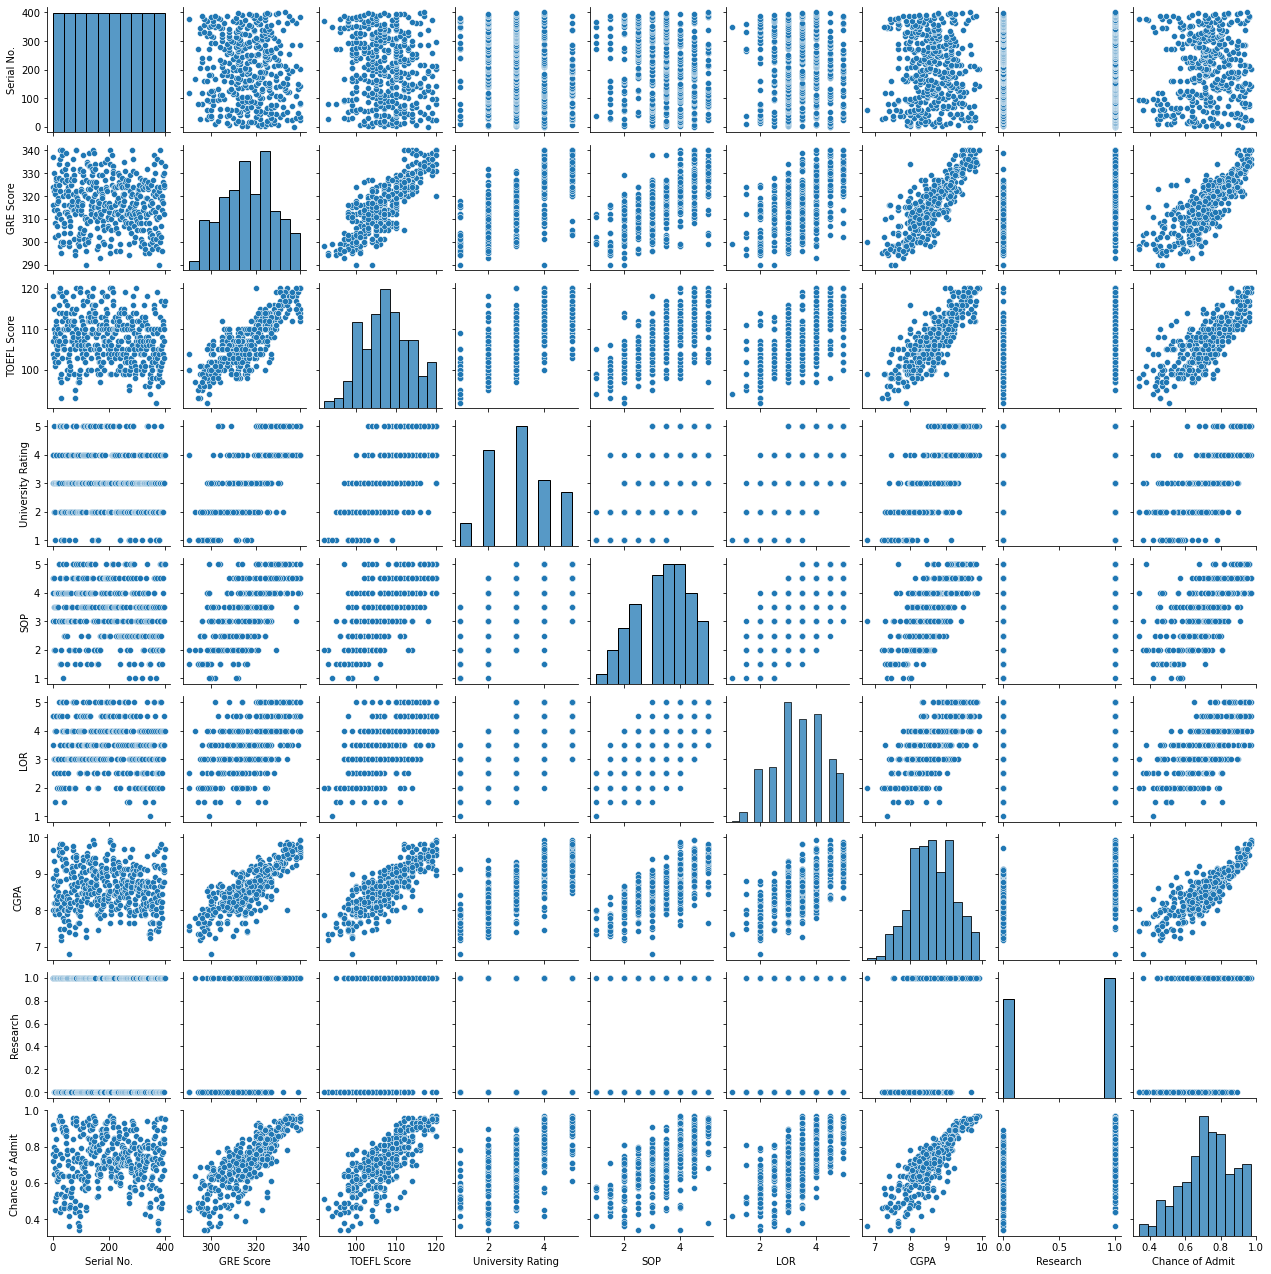

In [5]:
sns.pairplot(admit_data[cols], height=2.0)

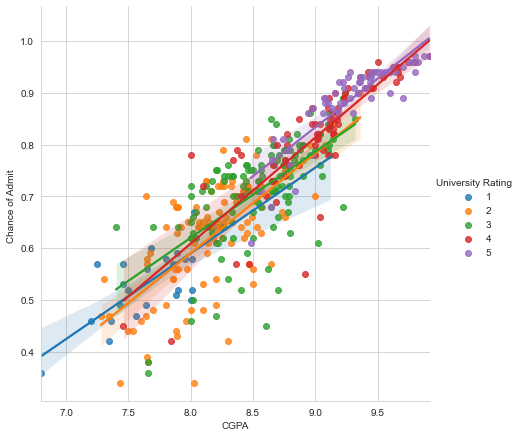

In [6]:
sns.set_style('whitegrid')
sns.lmplot(x='CGPA', y='Chance of Admit ', hue='University Rating', data=admit_data, height=6)


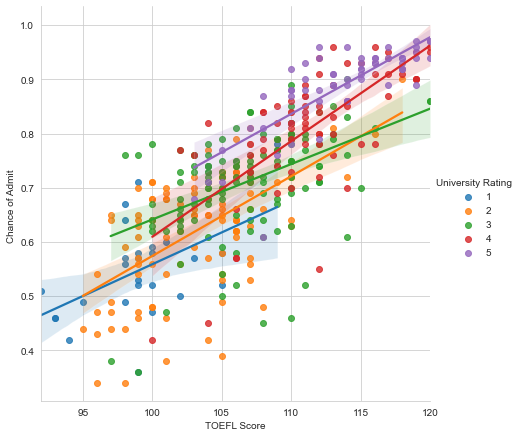

In [7]:

sns.lmplot(x='TOEFL Score', y='Chance of Admit ', hue='University Rating', data=admit_data, height=6)


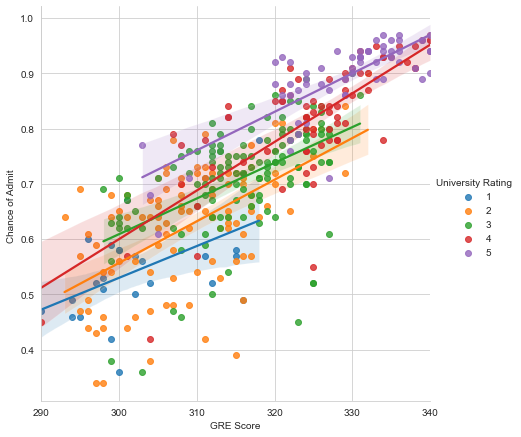

In [8]:

sns.lmplot(x='GRE Score', y='Chance of Admit ', hue='University Rating', data=admit_data, height=6)


# Observations for examination of statistics  

Looking at the Chance of Admission row we see a strong corelation between test scores, statement of purpose, and letter of recomendation, but less of a corelation with research experience.  

The histogram at the end of the row shows the typical chance of admission to be about 70% with more weight toward the higher chance of admission.  

Our data is on different scales, with the lower scales as 1 to 5 and the higher upto 0 to 340, the variables will have to be brought to the same scale with either standadization or normalization before our regression model is built.

#### Probablility Distribution of Admissions

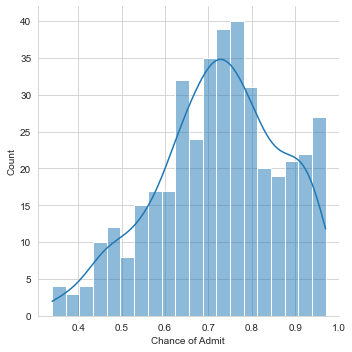

In [9]:
sns.displot(admit_data['Chance of Admit '], bins=20, kde=True)
plt.show()

#### Distribution  of School Ratings

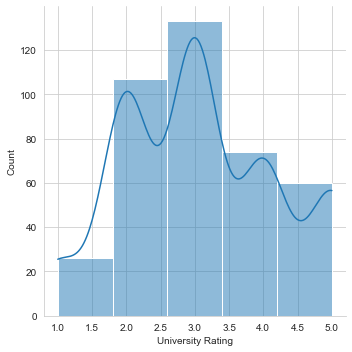

In [10]:
sns.displot(admit_data['University Rating'], bins=5, kde=True)
plt.show()

# Pandas Profiling Report for Data

In [11]:
profile = ProfileReport(admit_data, title="Pandas Profiling Report")
profile.to_widgets()
profile.to_file('Admission Predictions Profile Report.html')

# Variable Selection for Predictive Modeling

## Calculation of covariance matrix

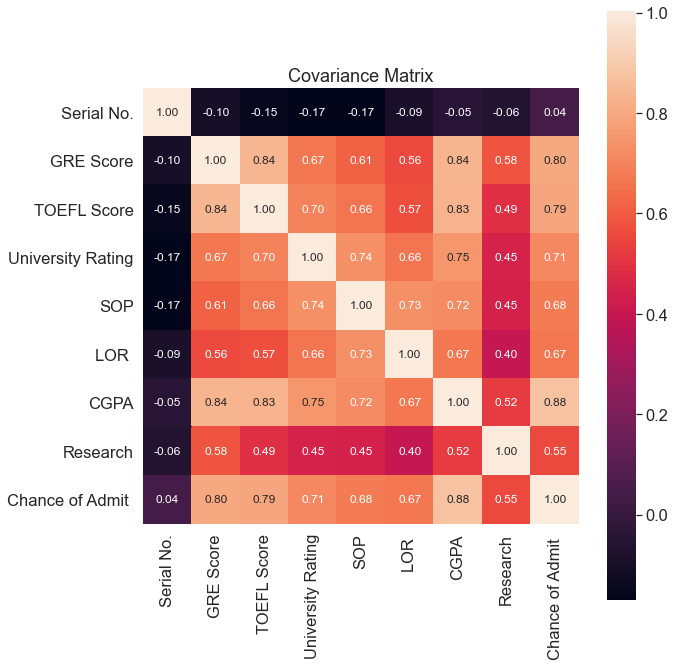

In [12]:
stdsc = StandardScaler()
X_std = stdsc.fit_transform(admit_data[cols].iloc[:,range(0,9)].values)
cov_mat = np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':12}, yticklabels=cols, xticklabels=cols)
plt.title('Covariance Matrix')
plt.tight_layout()
plt.show()

### Selecting Important Variables  

From the covariance matrix above we the the Admit variable correlats the strongest with the variables: CGPA, GRE Score and TOEFL Score, and less with the variables: University Rating, SOP and LOR.

In [13]:
cols_selected = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Chance of Admit ']
admit_data[cols_selected].head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0        337          118                  4  4.5   4.5  9.65   
1        324          107                  4  4.0   4.5  8.87   
2        316          104                  3  3.0   3.5  8.00   
3        322          110                  3  3.5   2.5  8.67   
4        314          103                  2  2.0   3.0  8.21   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65

In [14]:
admit_data_X = admit_data[cols_selected].iloc[:,0:8].values     # Features Matrix
admit_data_y = admit_data[cols_selected]['Chance of Admit ']    # Target Variable

In [15]:
admit_data_X.shape

(400, 7)

In [16]:
admit_data_y.shape

(400,)

### Scaling the X Data  

Our data is on different scales, with the lower scales as 1 to 5 and the higher upto 0 to 340, the variables will have to be brought to the same scale with standadization. This will center to the mean and scale to unit variance.

In [17]:
admit_X_scaled = scale(admit_data_X)
admit_X_scaled

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  1.37364801],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.25029671],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118, -0.03054111],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  1.30343855],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -0.38158839],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  1.58427637]])

#### Verify the scaling  

We can test to see that the scaling centered to the mean.

In [18]:
admit_X_scaled.mean().round(2)

0.0

#### Check for Standard Deviation  

We'll perform a similar check using panda's std() method.

In [19]:
admit_X_scaled.std(ddof=0)

1.0

#### Calculate the PCA Transformation  

Fit the PCA transfromation using the scaled data.

In [20]:
admit_pca = PCA().fit(admit_X_scaled)

Plot the cumulative variance ratio with number of components.

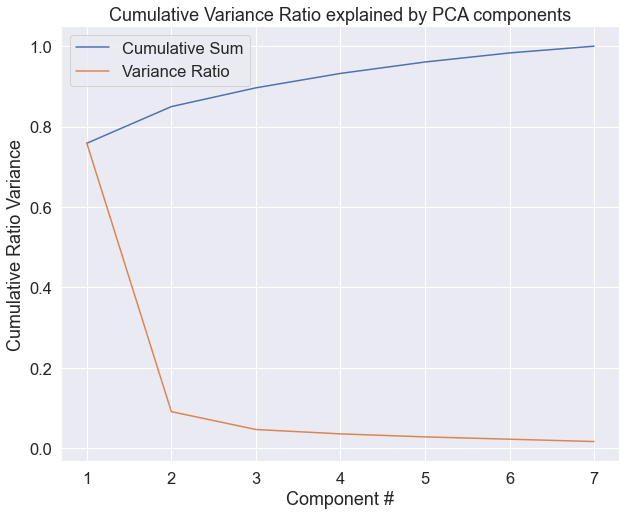

In [21]:
plt.subplots(figsize=(10,8))
plt.plot(admit_pca.explained_variance_ratio_.cumsum())
plt.plot(admit_pca.explained_variance_ratio_)
plt.xlabel('Component #')
plt.xticks([0, 1, 2, 3, 4, 5, 6,],['1', '2', '3', '4', '5', '6', '7'])
plt.ylabel('Cumulative Ratio Variance')
plt.title('Cumulative Variance Ratio explained by PCA components')
plt.legend(['Cumulative Sum', 'Variance Ratio']);

Looking at the plot above we can see that the first two Principle Components  account for about 85% of our variance in the Cumulative Sum. We can also see that there is a distinct 'elbow' the plot of variance ratio between component 2 and 3, telling us that components 3 thru 7 are much less important than components 1 and 2. 

# Linear Regression Ordinary Least Squares

In [22]:
# Check data shapes
admit_data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [23]:
# Choose X and Y data sets
X = admit_data.drop(['Serial No.', 'Chance of Admit '], axis=1)
y = admit_data['Chance of Admit ']
# Check Shapes
X.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0        337          118                  4  4.5   4.5  9.65         1
1        324          107                  4  4.0   4.5  8.87         1
2        316          104                  3  3.0   3.5  8.00         1
3        322          110                  3  3.5   2.5  8.67         1
4        314          103                  2  2.0   3.0  8.21         0

In [24]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [25]:
# Splitting the data
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=10)

In [26]:
# Check shapes
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(268, 7) (132, 7)
(268,) (132,)


In [27]:
import statsmodels.api as sm

# Create the model
rModel = sm.OLS(y_train, X_train)

# Fit the model
rModel_fit = rModel.fit()

# Evaluate the model
rModel_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Chance of Admit    R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              4170.
Date:                Sat, 02 Jan 2021   Prob (F-statistic):                   8.39e-264
Time:                        16:29:35   Log-Likelihood:                          334.41
No. Observations:                 268   AIC:                                     -654.8
Df Residuals:                     261   BIC:                                     -629.7
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GRE Score            -0.0032      0.001     -6.119      0.000      -0.004      -0.002
TOEFL Score           0.0031      0.002      1.990      0.048    3.32e-05       0.006
University Rating     0.0215      0.006      3.489      0.001       0.009       0.034
SOP                  -0.0039      0.007     -0.526      0.599      -0.019       0.011
LOR                   0.0200      0.008      2.637      0.009       0.005       0.035
CGPA                  0.1444      0.016      8.856      0.000       0.112       0.176
Research              0.0585      0.010      5.902      0.000       0.039       0.078
==============================================================================
Omnibus:                       43.169   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.022
Skew:                          -0.963   Prob(JB):                     7.60e-15
Kurtosis:                       4.453   Cond. No.                     1.28e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# Let's use our new model to make predictions of the dependent variable y. Use predict(), and plug in X_test as the parameter
y_pred = rModel_fit.predict(X_test)

# Combine the predictions and actual values into a data frame
pred_act = pd.DataFrame(y_test)
pred_act['Predicted Admit'] = y_pred
pred_act['Difference'] = (pred_act['Chance of Admit '] - pred_act['Predicted Admit']).round(2)
pred_act.sample(20)

Chance of Admit   Predicted Admit  Difference
81               0.96         0.888655        0.07
352              0.64         0.670973       -0.03
122              0.57         0.681194       -0.11
288              0.82         0.793621        0.03
155              0.77         0.714431        0.06
22               0.94         0.935863        0.00
96               0.48         0.584267       -0.10
154              0.80         0.705572        0.09
268              0.83         0.799662        0.03
316              0.54         0.578607       -0.04
169              0.65         0.564297        0.09
41               0.49         0.647416       -0.16
117              0.45         0.606722       -0.16
150              0.93         0.862864        0.07
336              0.72         0.699713        0.02
395              0.82         0.796384        0.02
187              0.93         0.883170        0.05
174              0.87         0.828471        0.04
72               0.93         0.935301       -0.01
331              0.73         0.639833        0.09

In [29]:
round(pred_act.Difference.mean(), 4)

0.0077

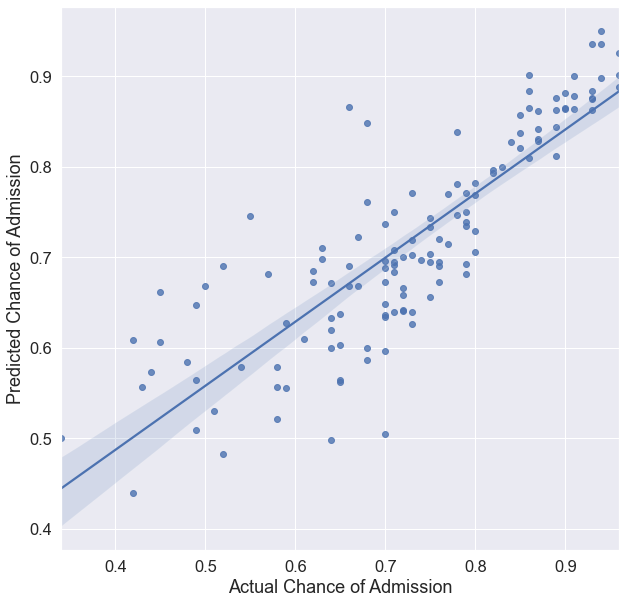

In [30]:
plt.figure(figsize=(10,10))
sns.regplot(x='Chance of Admit ', y='Predicted Admit', data=pred_act)
plt.xlabel('Actual Chance of Admission')
plt.ylabel('Predicted Chance of Admission');

### Check the Root Mean Squared Error

he RMSE tells us how far, on average, our predictions were mistaken. An RMSE of 0 would mean we were making perfect predictions. 

In [31]:
# Define a function to check the RMSE.
import math
from sklearn.metrics import mean_squared_error, r2_score 

def rmse(actual, predicted):
    return math.sqrt(mean_squared_error(actual, predicted))

round(rmse(pred_act['Chance of Admit '], pred_act['Predicted Admit']),4)

0.0743

## Lasso

In [42]:
# Choose X and Y data sets
X = admit_data.drop(['Serial No.', 'Chance of Admit '], axis=1)
y = admit_data['Chance of Admit ']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=10)

In [43]:
from sklearn.linear_model import Lasso

# Create the model
reg = Lasso(alpha=0.1)

# Fit the model
reg_fit = reg.fit(X_train, y_train)

# Evaluate the model
print('Independent term in decision fuction:',reg_fit.intercept_)

# Predict
y_pred_lasso = reg.predict(X_test)

# Return R^2
print('Coefficienct of determination R^2 of the prediction:',reg.score(X_test, y_test))

Independent term in decision fuction: -2.1299375273747017
Coefficienct of determination R^2 of the prediction: 0.6265021178092192


The coefficient __R^2__ is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

## Lasso hyperparameter tuning

In [44]:
from sklearn.model_selection import GridSearchCV

# Create an array of alpha values for testing
alphas = np.array([5, 0.5, 0.05, 0.005, 0.0005, 1 , 0.1, 0.01, 0.001, 0.0001,])

# Instantiate model
reg = Lasso()
grid = GridSearchCV(estimator=reg, param_grid=dict(alpha=alphas))

# Fit model
grid.fit(X_train, y_train)

# Return scores
print(grid.best_estimator_.alpha)
print(grid.best_score_)

0.001
0.8072072435166028


## Lasso tuned

In [45]:
# Create the model
reg = Lasso(alpha=0.001)

# Fit the model
reg_fit = reg.fit(X_train, y_train)

# Evaluate the model
print('Independent term in decision fuction:',reg_fit.intercept_)

# Predict
y_pred_lasso = reg.predict(X_test)

# Return R^2
print('Coefficienct of determination R^2 of the prediction:',reg.score(X_test, y_test))

Independent term in decision fuction: -1.4204560426695876
Coefficienct of determination R^2 of the prediction: 0.7531425195238023


## Using less data

In [33]:
admit_data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [34]:
# Choose X and Y data sets
X = admit_data[['GRE Score', 'TOEFL Score', 'CGPA']]
y = admit_data[['Chance of Admit ']]

# Check Shapes
X.head()

GRE Score  TOEFL Score  CGPA
0        337          118  9.65
1        324          107  8.87
2        316          104  8.00
3        322          110  8.67
4        314          103  8.21

In [35]:
y.head()

Chance of Admit 
0              0.92
1              0.76
2              0.72
3              0.80
4              0.65

In [36]:
# Splitting the data
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

# Check shapes
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(268, 3) (132, 3)
(268, 1) (132, 1)


In [37]:
import statsmodels.api as sm

# Create the model
rModel = sm.OLS(y_train, X_train)

# Fit the model
rModel_fit = rModel.fit()

# Evaluate the model
rModel_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Chance of Admit    R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              6851.
Date:                Sat, 02 Jan 2021   Prob (F-statistic):                   9.98e-251
Time:                        16:29:35   Log-Likelihood:                          285.21
No. Observations:                 268   AIC:                                     -564.4
Df Residuals:                     265   BIC:                                     -553.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
GRE Score      -0.0049      0.001     -9.736      0.000      -0.006      -0.004
TOEFL Score     0.0036      0.002      2.103      0.036       0.000       0.007
CGPA            0.2205      0.017     13.181      0.000       0.188       0.253
==============================================================================
Omnibus:                       23.914   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.749
Skew:                          -0.725   Prob(JB):                     9.43e-07
Kurtosis:                       3.618   Cond. No.                     1.09e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# Let's use our new model to make predictions of the dependent variable y.
y_pred = rModel_fit.predict(X_test)

# Combine the predictions and actual values into a data frame
pred_act = pd.DataFrame(y_test)
pred_act['predicted admit'] = y_pred
pred_act.head()

Chance of Admit   predicted admit
280              0.68         0.744381
236              0.85         0.828511
121              0.94         0.877885
332              0.75         0.678761
152              0.86         0.823920

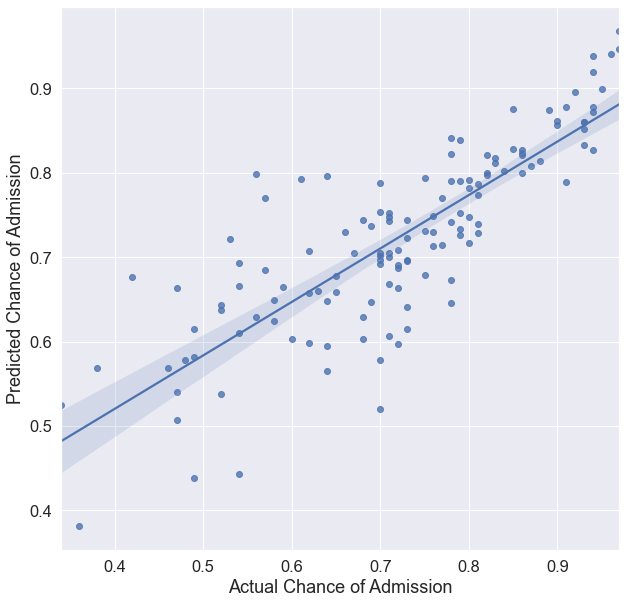

In [39]:
plt.figure(figsize=(10,10))
sns.regplot(x='Chance of Admit ', y='predicted admit', data=pred_act)
plt.xlabel('Actual Chance of Admission')
plt.ylabel('Predicted Chance of Admission');

### Check the Root Mean Squared Error
The RMSE tells us how far, on average, our predictions were mistaken. An RMSE of 0 would mean we were making perfect predictions.



In [40]:
round(rmse(pred_act['Chance of Admit '], pred_act['predicted admit']),4)

0.0811

### Using less data is less accurate
R Squared difference 0.99 vs. 0.98
RMSE difference 0.06 vs. 0.08